In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Salaries.csv')
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [8]:
data.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [9]:
data['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [10]:
data['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [11]:
data['discipline'].value_counts()

B    216
A    181
Name: discipline, dtype: int64

In [12]:
data['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

In [26]:
rel1=pd.crosstab(data['sex'],data['discipline'],margins=False)
rel1

discipline,A,B
sex,,
Female,18,21
Male,163,195


In [22]:
rel2=pd.crosstab(data['sex'],data['rank'])

In [24]:
#checking if there is significant relationship 
from scipy import stats

chi2,p,dof,expected= stats.chi2_contingency(observed=rel1)
print('P_value:',p)
print('Chi_square value:',chi2)
print('Ecpected Value:',expected)

P_value: 0.9242441594317525
Chi_square value: 0.009041912122286236
Ecpected Value: [[ 17.78085642  21.21914358]
 [163.21914358 194.78085642]]


In [25]:
chi2,p,dof,expected= stats.chi2_contingency(observed=rel2)
print('P_value:',p)
print('Chi_square value:',chi2)
print('Ecpected Value:',expected)

P_value: 0.014080466952222549
Chi_square value: 8.52593352916362
Ecpected Value: [[  6.28715365   6.58186398  26.13098237]
 [ 57.71284635  60.41813602 239.86901763]]


In [28]:
label=LabelEncoder()
list_data=['rank','discipline','sex']
for i in list_data:
    data[i] = label.fit_transform(data[i].astype(str))

In [29]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [33]:
print(data['rank'].value_counts(),data['discipline'].value_counts(),data['sex'].value_counts())

2    266
1     67
0     64
Name: rank, dtype: int64 1    216
0    181
Name: discipline, dtype: int64 1    358
0     39
Name: sex, dtype: int64


In [38]:
data.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [40]:
data.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

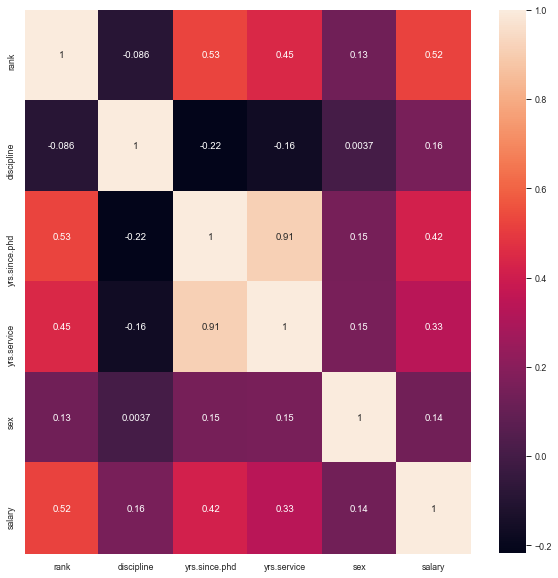

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

rank                AxesSubplot(0.125,0.536818;0.227941x0.343182)
discipline       AxesSubplot(0.398529,0.536818;0.227941x0.343182)
yrs.since.phd    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
yrs.service            AxesSubplot(0.125,0.125;0.227941x0.343182)
sex                 AxesSubplot(0.398529,0.125;0.227941x0.343182)
salary              AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

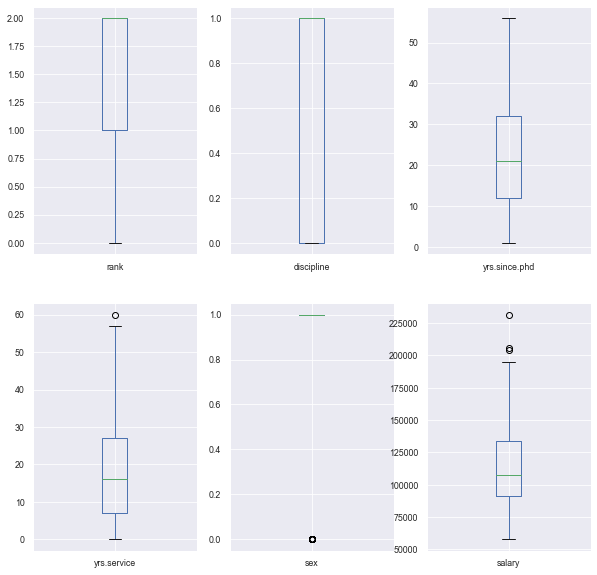

In [39]:
sns.set()
sns.set_context('paper')
data.plot(kind='box',subplots=True,layout=(2,3),figsize=(10,10))

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(data))

In [46]:
threshold=3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [47]:
#We will not drop outliers since most of them belong to categorical converted column 'sex' and might lead to biased prediction.

In [48]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [50]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((297, 5), (100, 5), (297,), (100,))

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(x_train,y_train)

LinearRegression()

In [59]:
y_pred=lr.predict(x_test)
print('MSE:',mean_squared_error(y_test,y_pred))

MSE: 383910380.2727105


In [56]:
from sklearn.metrics import mean_absolute_error,r2_score
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('R2_Score:',r2_score(y_test,y_pred))

Mean Absolute Error: 16421.370355237974
R2_Score: 0.43833565223402504


In [57]:
lr.coef_

array([17235.67010659, 14430.44380715,  1180.15357081,  -704.48702322,
        4472.0082559 ])

In [61]:
lr.score(x_train,y_train)

0.3470050074526344